In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/indian_food.csv')

In [ ]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


Here we can see there are many -1. We have to replce them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

There's one missing value. Let's fetch that row and replace it. 

In [ ]:
bool = pd.isnull(df['region'])
df[bool]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


As we can see the state is UP and region is NaN. So we can replace this NaN with north as UP belongs to North India region. 

In [ ]:
df['region'] = df['region'].replace(np.NaN, 'North')

In [ ]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [ ]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [ ]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [ ]:
df.replace(-1, np.NaN, inplace = True)
df.replace('-1',np.NaN, inplace = True)

In [ ]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,NaN,NaN,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central


In [ ]:
df.isna().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            13
dtype: int64

Now preparation time and cooking time column has many NaN values. To replace them we can use mean of them. 

In [ ]:
df.prep_time.fillna(df.prep_time.mean(), inplace = True)

In [ ]:
df.cook_time.fillna(df.cook_time.mean(), inplace= True)

In [ ]:
df.dropna()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.000000,25.000000,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.000000,30.000000,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.000000,60.000000,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.000000,30.000000,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.000000,40.000000,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.000000,30.000000,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.000000,60.000000,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,35.386667,38.911894,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.000000,45.000000,sweet,dessert,Madhya Pradesh,Central


In [ ]:
df.isna().sum()

name               0
ingredients        0
diet               0
prep_time          0
cook_time          0
flavor_profile    29
course             0
state             24
region            13
dtype: int64

Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


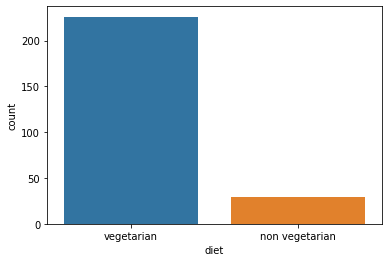

In [ ]:
sns.countplot('diet', data = df)

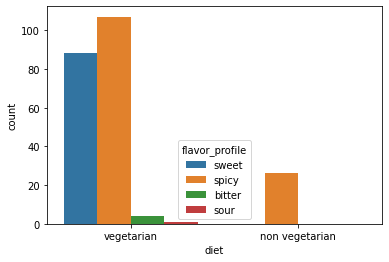

In [ ]:
sns.countplot(x = 'diet', hue = 'flavor_profile', data = df)

So from the above two plot we can see that Vegetarian count is bigger than non vegetarian count. And for both the categories of diet, spicy food takes the highes rank and sweet dishe ( for vegetarian) takes the second rank. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


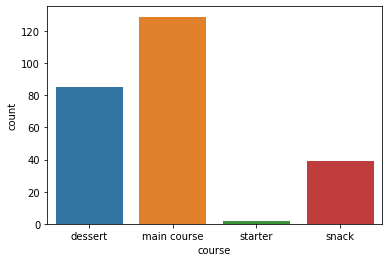

In [ ]:
sns.countplot('course', data = df)

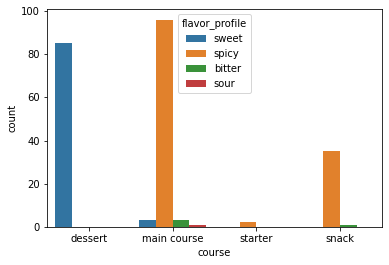

In [ ]:
sns.countplot(x = 'course', hue = 'flavor_profile', data = df)

So from the above plot we can see main course food is of highest number followed by dessert, snack and starter respectively. 

And if we segregate with food type then we can see most of the sweet dishes belong to dessert section followed by main course. Where the most of the spicy foods belong to main course followed by snack

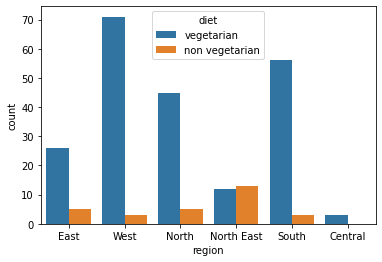

In [ ]:
sns.countplot(x = 'region', hue = 'diet', data = df)

So from here I can see only in north India non vegetarian count is higher than non vegetarian. 

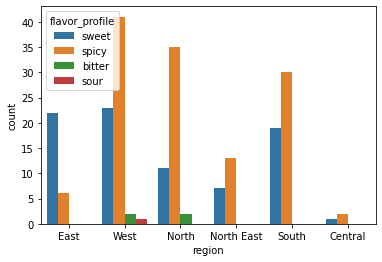

In [ ]:
sns.countplot(x = 'region', hue = 'flavor_profile', data = df)

Here we can see maximum number of spicy food belong to west India followed by north, south, north east, east and central as well as sweet dish is maximum in west followed by east, south, north, northeast and central.

In [ ]:
df_bengal = df[df.state == 'West Bengal']
df_bengal

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.000000,25.000000,sweet,dessert,West Bengal,East
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.000000,40.000000,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10.000000,50.000000,sweet,dessert,West Bengal,East
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20.000000,30.000000,sweet,dessert,West Bengal,East
23,Cham cham,"Flour, cream, sugar, saffron, lemon juice, coc...",vegetarian,40.000000,60.000000,sweet,dessert,West Bengal,East
25,Ledikeni,"Chhena, sugar, ghee",vegetarian,45.000000,45.000000,sweet,dessert,West Bengal,East
28,Mihidana,"Besan flour, sugar, ghee",vegetarian,15.000000,30.000000,sweet,dessert,West Bengal,East
29,Misti doi,"Milk, jaggery",vegetarian,480.000000,30.000000,sweet,dessert,West Bengal,East
30,Pantua,"Chhena, sugar, ghee, flour",vegetarian,45.000000,45.000000,sweet,dessert,West Bengal,East
33,Ras malai,"Chhena, reduced milk, pistachio",vegetarian,180.000000,60.000000,sweet,dessert,West Bengal,East


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


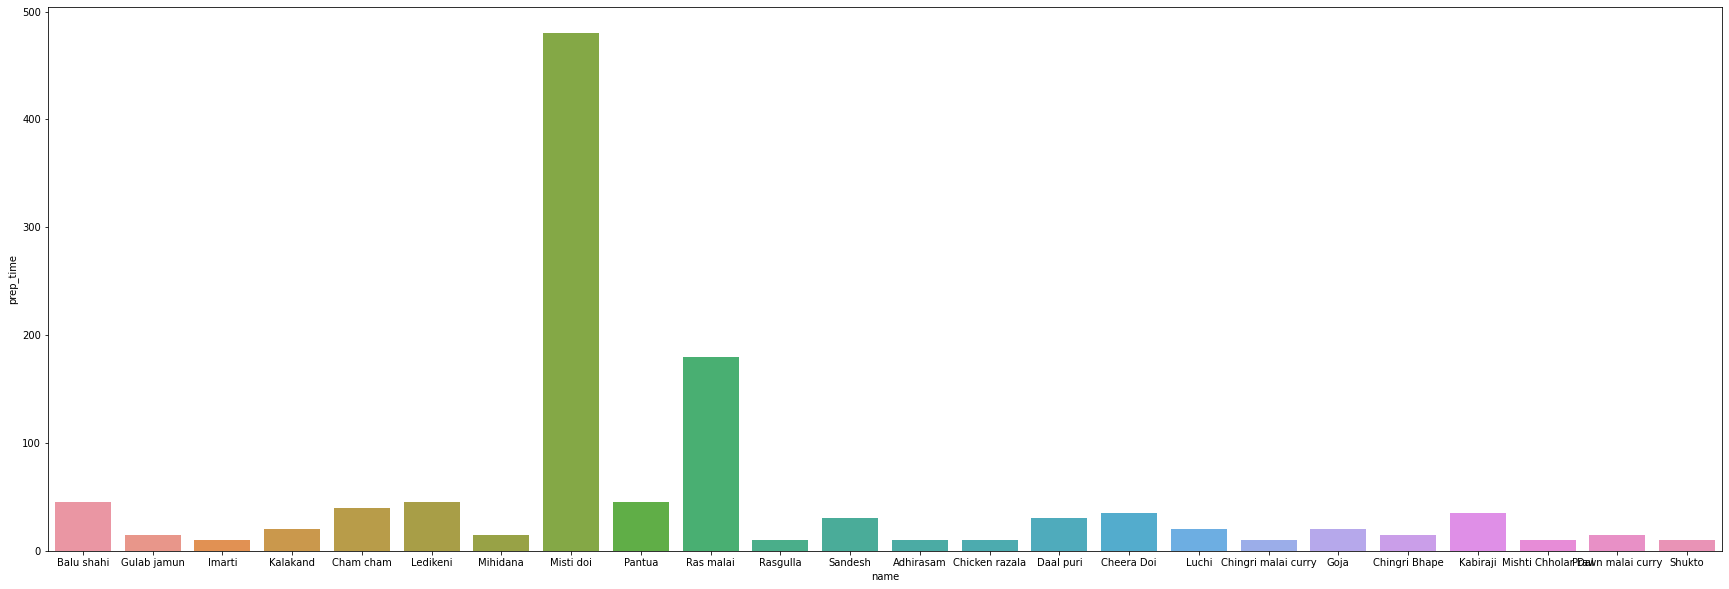

In [ ]:
plt.figure(figsize = (30,10))
sns.barplot('name', 'prep_time', data= df_bengal)

So here we can see Misti doi takes longest time duration for preparation

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


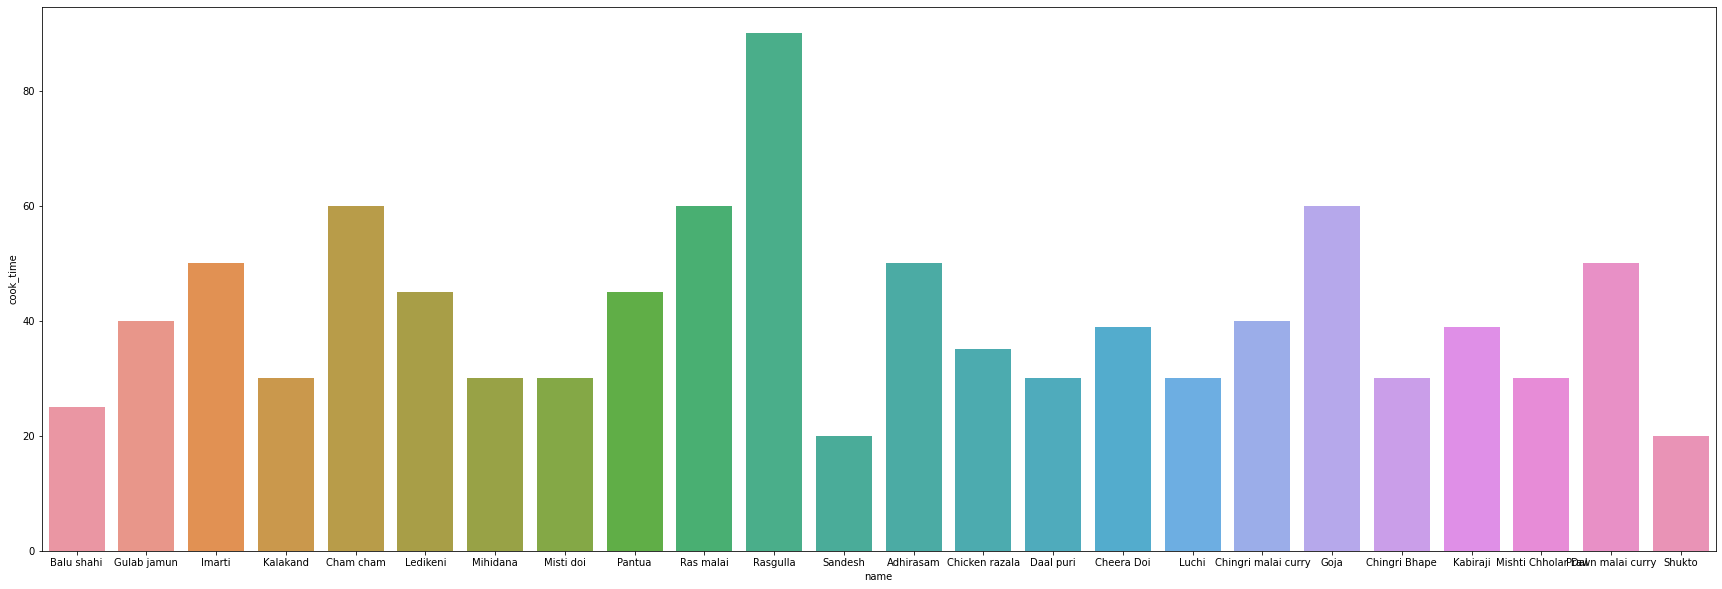

In [ ]:
plt.figure(figsize = (30,10))
sns.barplot('name', 'cook_time', data = df_bengal)

From here we can see Rasgulla takes longes period to get cooked.

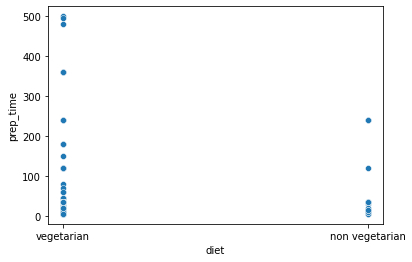